<h1>Import Libarires</h1>

In [1]:
import numpy as np
from tensorflow import keras
from keras.datasets import mnist
from skimage.feature import hog
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
%matplotlib inline

<h1>Loading Data & Normalization</h1>

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

<h1>Function to Get HOG of Data (Training & Test)</h1>

In [3]:
#applies hog function to extract features from images
def hog_fun(images):
    features = []
    for i in images:
        feature = hog(i, orientations= 9,pixels_per_cell=(8,8),cells_per_block=(1,1))
        features.append(feature)
    return np.array(features)    

In [4]:
train_features = hog_fun(x_train)
test_features  = hog_fun(x_test)

In [5]:
print(train_features.shape)
print(test_features.shape)

(60000, 81)
(10000, 81)


<h1>Heatmap Plotting Function</h1>
<p>    heat map visualization is a confusion matrix technique </p>
<p>    that has a spectrum of color that highlights the number</p>
<p>    of data points inside each cell, the higher the number the warmer the colour. </p>

In [1]:
def heat_map(actual, predicted):
  cm = confusion_matrix(actual, predicted)
  plt.figure(figsize=(9,9))
  sn.heatmap(cm, annot = True, fmt='g')
  plt.xlabel('Predicted')
  plt.ylabel('Actual')

<h1>KNN Classifier with GridSearch</h1>
<p>The K-Nearest Neighbor Classifier: 
Regarding the KNN classifier, we utilized the GridSearchCV() method</p>
<p>for the parameter hyper tuning and found out that</p>
<p>The Best hyper-parameter was at K = 8, which yielded a best score of 90.7%.</p>
<p>Generally speaking, the KNN classifier and its family (Parzen windows classifier) run very poorly on image type data.</p>

In [7]:
#applying grid search function to choose best value for the K 
GridSK = GridSearchCV(KNeighborsClassifier(),{
    "n_neighbors":[1,2,3,4,5,6,7,8,9,10]
},
cv=10
)
GridSK.fit(train_features,y_train)


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [8]:
print(GridSK.best_params_, " ",GridSK.best_score_)

{'n_neighbors': 8}   0.9066500000000002


In [9]:
y_pred = GridSK.predict(test_features)

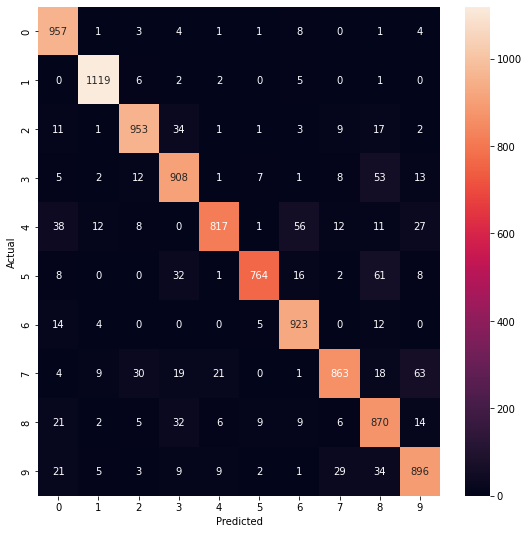

In [10]:
heat_map(y_test, y_pred)

In [11]:
GridSK.score(test_features,y_test)

0.907

In [12]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       980
           1       0.97      0.99      0.98      1135
           2       0.93      0.92      0.93      1032
           3       0.87      0.90      0.89      1010
           4       0.95      0.83      0.89       982
           5       0.97      0.86      0.91       892
           6       0.90      0.96      0.93       958
           7       0.93      0.84      0.88      1028
           8       0.81      0.89      0.85       974
           9       0.87      0.89      0.88      1009

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



<h1>SVM with GridSearch</h1>
<p>The SVM Classifier: 
in the case of the SVM classifier, we also utilized the GridSearchCV() method</p>
<p>for the parameter hyper tuning and found out that</p>
<p>The Best hyper-parameter was at c = 5 and kernel= rbf which yielded a best score of 96%.</p>
<p>the svm classifier performs better on image type data but runs alot slower.</p>

In [13]:
#applying grid search function to choose best value for the c and the kernel
GridSS = GridSearchCV(SVC(),{
    'kernel': ['linear', 'rbf','sigmoid', 'gaussian'],
    'C':[1, 3, 5, 7, 10] 
},
cv=10
)
GridSS.fit(train_features,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [1, 5, 10], 'kernel': ['linear', 'rbf']})

In [14]:
print(GridSS.best_params_, " ", GridSS.best_score_)

{'C': 5, 'kernel': 'rbf'}   0.9565833333333332


In [15]:
y_pred = GridSS.predict(test_features)

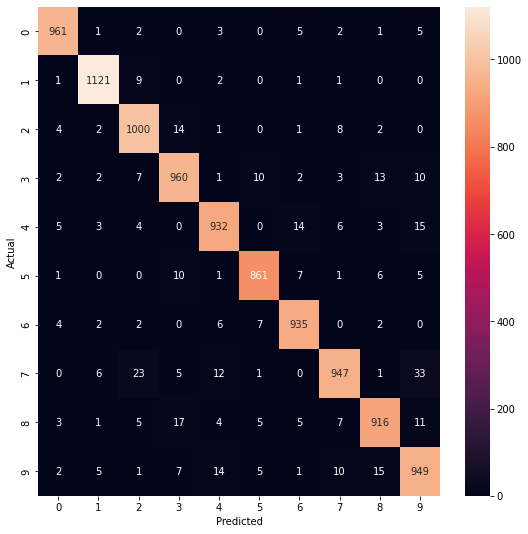

In [16]:
heat_map(y_test, y_pred)

In [17]:
GridSS.score(test_features,y_test)

0.9582

In [18]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       980
           1       0.98      0.99      0.98      1135
           2       0.95      0.97      0.96      1032
           3       0.95      0.95      0.95      1010
           4       0.95      0.95      0.95       982
           5       0.97      0.97      0.97       892
           6       0.96      0.98      0.97       958
           7       0.96      0.92      0.94      1028
           8       0.96      0.94      0.95       974
           9       0.92      0.94      0.93      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



<h1>Artifical neural network </h1>
<p>The keras sequential(neural network) Classifier: 
Regarding the ANN classifier, we were forced to brute force search for the optimal parameters</p>
<p>as the GridSearchCV() method does not work with keras sequential model when searching for the activation parameter</p>
<p>for the parameter hyper tuning and found out that</p>
<p>The Best hyper-parameter was at optimizer=Nadam, first activation function=tanh</p> 
<p>and the second activation function = sigmoid which yielded a best score of 97%.</p>
<p>Generally speaking, the ANN classifier and its family run extremely well on image type data.</p>

In [19]:
#brute force search for chooseing best activation and optimizer
optimizers = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
activations = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
activations_ = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
b_acc=current_accuracy=0
for activation in activations:
    for activation_ in activations_:
        for optimizer in optimizers:
            model = keras.Sequential([
            keras.layers.Flatten(input_shape = (28,28)),
            keras.layers.Dense(100,activation = activation_),#activation = 'relu','softmax'
            keras.layers.Dense(10,activation = activation)
            ])
    
        model.compile(optimizer = optimizer, 
              loss = 'sparse_categorical_crossentropy',#optimizer = SGD(....), sparse_categorical_crossentropy == softmax
              metrics = ["accuracy"] 
        )
        model.fit(x_train, y_train, epochs=5)
        y_pred=model.predict(x_test)
        l, current_accuracy=model.evaluate(x_test, y_test)
        
        #print((b_activation,b_optimizer,b_acc))
        if current_accuracy>=b_acc:
            b_optimizer=optimizer
            b_activation=activation
            b_activation_=activation_
            b_acc=current_accuracy
print((b_activation_,b_activation,b_optimizer,b_acc))

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 1.3047 - accuracy: 0.6761
Epoch 2/5
1875/1875 [==============================] - ETA: 0s - loss: 0.7635 - accuracy: 0.69 - 5s 2ms/step - loss: 0.7628 - accuracy: 0.6986
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5998 - accuracy: 0.8016
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4194 - accuracy: 0.8875
Epoch 5/5
313/313 [==============================] - 1s 1ms/step - loss: 0.3327 - accuracy: 0.9128
Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3328 - accuracy: 0.9061
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1647 - accuracy: 0.9519
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1147 - accuracy: 0.9664
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0859 - accuracy: 0.9739
Epoch 5/5
313/313 [==============================] 

In [27]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(100,activation = b_activation_),#activation = 'relu','softmax'
    keras.layers.Dense(10,activation = b_activation)
    ])

model.compile(optimizer = b_optimizer, 
              loss = 'sparse_categorical_crossentropy',#optimizer = SGD(....), sparse_categorical_crossentropy == softmax
              metrics = ["accuracy"] 
)
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2985 - accuracy: 0.9160: 0s - loss: 0.309
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1422 - accuracy: 0.9591
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0978 - accuracy: 0.9715
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0739 - accuracy: 0.9783
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0572 - accuracy: 0.9837


In [28]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0856 - accuracy: 0.9743


[0.0856456384062767, 0.9743000268936157]

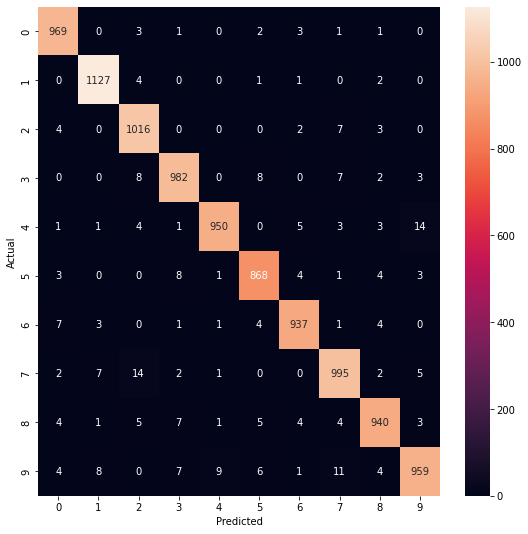

In [29]:
y_pred = model.predict(x_test)
labels = [np.argmax(i) for i in y_pred]

heat_map(y_test,labels)

In [30]:
print(classification_report(y_test, labels))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.96      0.98      0.97      1032
           3       0.97      0.97      0.97      1010
           4       0.99      0.97      0.98       982
           5       0.97      0.97      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.97      0.97      1028
           8       0.97      0.97      0.97       974
           9       0.97      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



<h1>Final analysis and conclusion</h1>
<p>After comparing results from the three classifires(KNN, SVM, ANN) </p>
<p>and found out that the artificial neural network classifier </p>
<p>was the best as it achieved the highest score among them across all score measures<p/>
<p>however the ANN classifier is a double edged sword,</p>
<p>as it allows maximum flexibility with the many types of hyper-parameters to choose from,</p>
<p>consisting of number of layers, number of neurons, optimizers, activation function and initializers,</p>
<p>but that comes at the cost of severe computational load to choose</p>
<p>the optimal hyper parameters using brute force search.</p>